# 1 Author

**Student Name**:  Samrudhi Sunil Bhosale
**Student ID**:  230854907



# 2 Problem formulation

Describe the machine learning problem that you want to solve and explain what's interesting about it.

Using the MLEnd Yummy Dataset, build a machine learning pipeline that takes as an input a photo of a dish that has either rice or chips and predicts whether the picture has rice or chips

# 3 Machine Learning pipeline

Describe your ML pipeline. Clearly identify its input and output, any intermediate stages (for instance, transformation -> models), and format of the intermediate data moving from one stage to the next. It's up to you to decide which stages to include in your pipeline.

# 4 Transformation stage

Describe any transformations, such as feature extraction. Identify input and output. Explain why you have chosen this transformation stage.

# 5 Modelling

Describe the ML model(s) that you will build. Explain why you have chosen them.

# 6 Methodology

Describe how you will train and validate your models, how model performance is assesssed (i.e. accuracy, confusion matrix, etc)

# 7 Dataset

Describe the dataset that you will use to create your models and validate them. If you need to preprocess it, do it here. Include visualisations too. You can visualise raw data samples or extracted features.

# 8 Results

Carry out your experiments here, explain your results.

# 9 Conclusions

Your conclusions, suggestions for improvements, etc should go here

In [2]:
!pip install mlend

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 16.2 MB/s eta 0:00:00


In [3]:
from google.colab import drive

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import spkit as sp

from skimage import exposure
from skimage.color import rgb2hsv, rgb2gray
import skimage as ski

import mlend
from mlend import download_yummy, yummy_load

import os, sys, re, pickle, glob
import urllib.request
import zipfile

import IPython.display as ipd
from tqdm import tqdm
import librosa

drive.mount('/content/drive')

Mounted at /content/drive


In [4]:

subset = {}

datadir = download_yummy(save_to = '/content/drive/MyDrive/Data/MLEnd/miniproject/', subset = subset,verbose=1,overwrite=False)

100%|▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓|3250\3250|003250.jpg
Done!


In [5]:
os.listdir(datadir)
# print(datadir)

['MLEndYD_images', 'MLEndYD_image_attributes_benchmark.csv']

In [6]:
MLENDYD_df = pd.read_csv('/content/drive/MyDrive/Data/MLEnd/miniproject/yummy/MLEndYD_image_attributes_benchmark.csv').set_index('filename')
MLENDYD_df

,Diet,Cuisine_org,Cuisine,Dish_name,Home_or_restaurant,Ingredients,Healthiness_rating,Healthiness_rating_int,Likeness,Likeness_int,Benchmark_A
filename,,,,,,,,,,,
000001.jpg,non_vegetarian,japanese,japanese,chicken_katsu_rice,marugame_udon,"rice,chicken_breast,spicy_curry_sauce",neutral,3.0,like,4.0,Train
000002.jpg,non_vegetarian,english,english,english_breakfast,home,"eggs,bacon,hash_brown,tomato,bread,tomato,bake...",unhealthy,2.0,like,4.0,Train
000003.jpg,non_vegetarian,chinese,chinese,spicy_chicken,jinli_flagship_branch,"chili,chicken,peanuts,sihuan_peppercorns,green...",neutral,3.0,strongly_like,5.0,Train
000004.jpg,vegetarian,indian,indian,gulab_jamun,home,"sugar,water,khoya,milk,salt,oil,cardamon,ghee",unhealthy,2.0,strongly_like,5.0,Train
000005.jpg,non_vegetarian,indian,indian,chicken_masala,home,"chicken,lemon,turmeric,garam_masala,coriander_...",healthy,4.0,strongly_like,5.0,Train
...,...,...,...,...,...,...,...,...,...,...,...
003246.jpg,vegetarian,indian,indian,zeera_rice,home,"1_cup_basmati_rice,2_cups_water,2_tablespoons_...",healthy,4.0,strongly_like,5.0,Train
003247.jpg,vegetarian,indian,indian,paneer_and_dal,home,"fried_cottage_cheese,ghee,lentils,milk,wheat_f...",healthy,4.0,strongly_like,5.0,Test
003248.jpg,vegetarian,indian,indian,samosa,home,"potato,onion,peanut,salt,turmeric_powder,red_c...",very_unhealthy,1.0,like,4.0,Test


In [7]:
sample_path = '/content/drive/MyDrive/Data/MLEnd/miniproject/yummy/MLEndYD_images/*.jpg'
files = glob.glob(sample_path)
len(files)

3250

(-0.5, 3734.5, 2693.5, -0.5)

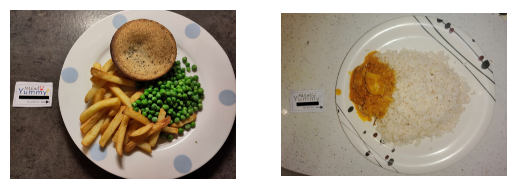

In [40]:
I = plt.imread('/content/drive/MyDrive/Data/MLEnd/miniproject/yummy/MLEndYD_images/000024.jpg')
plt.subplot(1,2,1)
plt.imshow(I)
plt.axis('off')

I = plt.imread('/content/drive/MyDrive/Data/MLEnd/miniproject/yummy/MLEndYD_images/000038.jpg')
plt.subplot(1,2,2)
plt.imshow(I)
plt.axis('off')

In [9]:
# TrainSet, TestSet, Map = yummy_small_load(datadir_main=datadir,train_test_split='Benchmark_A')

# 1. Create a new df which will contain only rice and chips data
# 2. covert them into 2 diff df Train and Test DataFrame
# 3. mapping of rice and chips to 0, 1
4.

4.0

In [52]:
MLENDYD_df.columns
filtered_df = MLENDYD_df[MLENDYD_df['Ingredients'].str.contains('rice|chips|fries', case=False, na=False)]


In [53]:
filtered_df.shape

(852, 11)

In [91]:
train_df = filtered_df[filtered_df['Benchmark_A'] == 'Train']
test_df = filtered_df[filtered_df['Benchmark_A'] == 'Test']

In [55]:
train_df.shape

(584, 11)

In [56]:
train_df.head(5)


,Diet,Cuisine_org,Cuisine,Dish_name,Home_or_restaurant,Ingredients,Healthiness_rating,Healthiness_rating_int,Likeness,Likeness_int,Benchmark_A
filename,,,,,,,,,,,
000001.jpg,non_vegetarian,japanese,japanese,chicken_katsu_rice,marugame_udon,"rice,chicken_breast,spicy_curry_sauce",neutral,3.0,like,4.0,Train
000021.jpg,non_vegetarian,asian,asian,biryani,home,"mutton,rice,onion,tomato,red_chilli_powder,sal...",healthy,4.0,strongly_like,5.0,Train
000022.jpg,vegetarian,indian,indian,rice_beetroot_curry,home,"rice,beetroot,salt,spices",very_healthy,5.0,neutral,3.0,Train
000024.jpg,vegan,british,british,pie_and_chips,home,"mushroom_pie,chips,peas",neutral,3.0,like,4.0,Train
000026.jpg,non_vegetarian,pakistani,pakistani,chicken_biryani,home,"rice,chicken,biryani_masala,yogurt,oil,green_c...",healthy,4.0,strongly_like,5.0,Train


In [57]:
test_df.shape

(268, 11)

In [58]:
test_df.head(5)

,Diet,Cuisine_org,Cuisine,Dish_name,Home_or_restaurant,Ingredients,Healthiness_rating,Healthiness_rating_int,Likeness,Likeness_int,Benchmark_A
filename,,,,,,,,,,,
000016.jpg,vegan,indian,indian,khichdi,home,"rice,spices,herbs",healthy,4.0,neutral,3.0,Test
000020.jpg,vegetarian,indian,indian,lentil-based_vegetable_stew_with__rice,home,ingredients:\nfor_cooking_rice:\n1_cup_rice_(a...,healthy,4.0,like,4.0,Test
000038.jpg,non_vegetarian,indian,indian,rice_with_chicken_curry,home,"boiled_rice,chicken,sunflower_oil,chilli_powde...",healthy,4.0,strongly_like,5.0,Test
000039.jpg,vegetarian,south_indian,south_indian,khichidi,home,"rice,moong_lentils,ghee,cumin_seeds,ginger",very_healthy,5.0,like,4.0,Test
000040.jpg,non_vegetarian,indian,indian,chicken_biryani,restaurant,"rice,chicken,potatos_and_spicy,",neutral,3.0,strongly_like,5.0,Test


In [92]:
def map_ingredients(ingredients):
    if 'rice' in ingredients.lower():
        return 1
    else:
        return 0

In [93]:
train_df['Ingredient_Map'] = train_df['Ingredients'].apply(map_ingredients)
test_df['Ingredient_Map'] = test_df['Ingredients'].apply(map_ingredients)


<ipython-input-93-93bb7318fe25>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
<ipython-input-93-93bb7318fe25>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [88]:
train_df.head()

,Diet,Cuisine_org,Cuisine,Dish_name,Home_or_restaurant,Ingredients,Healthiness_rating,Healthiness_rating_int,Likeness,Likeness_int,Benchmark_A,path,Ingredient_Map
filename,,,,,,,,,,,,,
000001.jpg,non_vegetarian,japanese,japanese,chicken_katsu_rice,marugame_udon,"rice,chicken_breast,spicy_curry_sauce",neutral,3.0,like,4.0,Train,/content/drive/MyDrive/Data/MLEnd/miniproject/...,1
000021.jpg,non_vegetarian,asian,asian,biryani,home,"mutton,rice,onion,tomato,red_chilli_powder,sal...",healthy,4.0,strongly_like,5.0,Train,/content/drive/MyDrive/Data/MLEnd/miniproject/...,1
000022.jpg,vegetarian,indian,indian,rice_beetroot_curry,home,"rice,beetroot,salt,spices",very_healthy,5.0,neutral,3.0,Train,/content/drive/MyDrive/Data/MLEnd/miniproject/...,1
000024.jpg,vegan,british,british,pie_and_chips,home,"mushroom_pie,chips,peas",neutral,3.0,like,4.0,Train,/content/drive/MyDrive/Data/MLEnd/miniproject/...,0
000026.jpg,non_vegetarian,pakistani,pakistani,chicken_biryani,home,"rice,chicken,biryani_masala,yogurt,oil,green_c...",healthy,4.0,strongly_like,5.0,Train,/content/drive/MyDrive/Data/MLEnd/miniproject/...,1


In [62]:
test_df.columns

Index(['Diet', 'Cuisine_org', 'Cuisine', 'Dish_name', 'Home_or_restaurant',
       'Ingredients', 'Healthiness_rating', 'Healthiness_rating_int',
       'Likeness', 'Likeness_int', 'Benchmark_A', 'Ingredient_Map'],
      dtype='object')

In [94]:
base_path = "/content/drive/MyDrive/Data/MLEnd/miniproject/yummy/MLEndYD_images/"

# Add 'path' column to train_df
train_df['path'] = base_path + train_df.index.astype(str)

# Add 'path' column to test_df
test_df['path'] = base_path + test_df.index.astype(str)

<ipython-input-94-3fd6b3c90ba6>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
<ipython-input-94-3fd6b3c90ba6>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [64]:
test_df.head()


,Diet,Cuisine_org,Cuisine,Dish_name,Home_or_restaurant,Ingredients,Healthiness_rating,Healthiness_rating_int,Likeness,Likeness_int,Benchmark_A,Ingredient_Map,path
filename,,,,,,,,,,,,,
000016.jpg,vegan,indian,indian,khichdi,home,"rice,spices,herbs",healthy,4.0,neutral,3.0,Test,1,/content/drive/MyDrive/Data/MLEnd/miniproject/...
000020.jpg,vegetarian,indian,indian,lentil-based_vegetable_stew_with__rice,home,ingredients:\nfor_cooking_rice:\n1_cup_rice_(a...,healthy,4.0,like,4.0,Test,1,/content/drive/MyDrive/Data/MLEnd/miniproject/...
000038.jpg,non_vegetarian,indian,indian,rice_with_chicken_curry,home,"boiled_rice,chicken,sunflower_oil,chilli_powde...",healthy,4.0,strongly_like,5.0,Test,1,/content/drive/MyDrive/Data/MLEnd/miniproject/...
000039.jpg,vegetarian,south_indian,south_indian,khichidi,home,"rice,moong_lentils,ghee,cumin_seeds,ginger",very_healthy,5.0,like,4.0,Test,1,/content/drive/MyDrive/Data/MLEnd/miniproject/...
000040.jpg,non_vegetarian,indian,indian,chicken_biryani,restaurant,"rice,chicken,potatos_and_spicy,",neutral,3.0,strongly_like,5.0,Test,1,/content/drive/MyDrive/Data/MLEnd/miniproject/...


In [97]:
ingredient_0_rows = train_df[train_df['Ingredient_Map'] == 0].head(51)
ingredient_1_rows = train_df[train_df['Ingredient_Map'] == 1].head(51)
train_df = ingredient_0_rows.append(ingredient_1_rows, ignore_index=False)

<ipython-input-97-3c80f3631271>:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


In [143]:
random_index = np.random.permutation(train_df.index)

# Use the random index to shuffle the DataFrame
train_df = train_df.loc[random_index]

In [146]:
train_df.head()

,Diet,Cuisine_org,Cuisine,Dish_name,Home_or_restaurant,Ingredients,Healthiness_rating,Healthiness_rating_int,Likeness,Likeness_int,Benchmark_A,Ingredient_Map,path
filename,,,,,,,,,,,,,
000166.jpg,non_vegetarian,indian,indian,egg_curry,home,"rice,eggs,tomato,onion,garlic,ginger,curd,water",healthy,4.0,like,4.0,Train,1,/content/drive/MyDrive/Data/MLEnd/miniproject/...
000109.jpg,non_vegetarian,indo-chinese,indo_chinese,indo-chinese_meal,ymca_indian_restaurant,"rice,carrot,peas,corn,chicken,cauliflower,bell...",healthy,4.0,like,4.0,Train,1,/content/drive/MyDrive/Data/MLEnd/miniproject/...
000331.jpg,vegetarian,indian,indian,veg_biyani,home,rice,NaN,NaN,NaN,NaN,Train,1,/content/drive/MyDrive/Data/MLEnd/miniproject/...
000277.jpg,vegetarian,indian,indian,rice_pudding,home,"rice,milk,jaggary,almond,cashew,pistachios,des...",neutral,3.0,like,4.0,Train,1,/content/drive/MyDrive/Data/MLEnd/miniproject/...
003159.jpg,non_vegetarian,lebanese,lebanese,ribeye_steak,restaurant,"ribeye_steak_with_garlic_sauce,fries,mixed_sal...",unhealthy,2.0,strongly_like,5.0,Train,0,/content/drive/MyDrive/Data/MLEnd/miniproject/...


In [99]:
ingredient_0_rows = test_df[test_df['Ingredient_Map'] == 0].head(26)
ingredient_1_rows = test_df[test_df['Ingredient_Map'] == 1].head(26)
test_df = ingredient_0_rows.append(ingredient_1_rows, ignore_index=False)

<ipython-input-99-9b0a54f73603>:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


In [148]:
random_index = np.random.permutation(test_df.index)

# Use the random index to shuffle the DataFrame
test_df = test_df.loc[random_index]

In [149]:
test_df.head()

,Diet,Cuisine_org,Cuisine,Dish_name,Home_or_restaurant,Ingredients,Healthiness_rating,Healthiness_rating_int,Likeness,Likeness_int,Benchmark_A,Ingredient_Map,path
filename,,,,,,,,,,,,,
000814.jpg,non_vegetarian,south_african,south_african,nando's_butterfly_chicken_with_garlic_bread_an...,restaurant,"for_butterfly_chicken:\nwhole_chicken,nando's_...",healthy,4.0,strongly_like,5.0,Test,0,/content/drive/MyDrive/Data/MLEnd/miniproject/...
001962.jpg,non_vegetarian,british,british,fish_and_chips,restaurant,"fish,chips，beans,",unhealthy,2.0,neutral,3.0,Test,0,/content/drive/MyDrive/Data/MLEnd/miniproject/...
001308.jpg,non_vegetarian,american,american,bbq_smoky_king,restraurant,"beef_patty,lettuce,mayonaisse,french_fries,bun",neutral,3.0,strongly_like,5.0,Test,0,/content/drive/MyDrive/Data/MLEnd/miniproject/...
002970.jpg,non_vegetarian,italian,italian,chicken_lasagne_with_fries_and_coleslaw,the_curve,"chicken,lasagne_sheets,cheese,milk,greens,chip...",neutral,3.0,strongly_like,5.0,Test,0,/content/drive/MyDrive/Data/MLEnd/miniproject/...
000143.jpg,vegetarian,fusion_(indian-thai),indian_thai_fusion,paneer_thai_fried_rice,restaurant,"cooked_rice,paneer,vegetables,thai_seasonings",healthy,4.0,like,4.0,Test,1,/content/drive/MyDrive/Data/MLEnd/miniproject/...


In [118]:
def create_dataset_dict(df):
    dataset_dict = {
        'X_paths': df['path'].tolist(),
        'Y': np.array(df['Ingredient_Map'].apply(lambda x: 'rice' if x == 1 else 'chips').tolist(), dtype=object),
        'Y_encoded': np.array(df['Ingredient_Map'].tolist(), dtype=object)
    }
    return dataset_dict

In [145]:
TrainSet = create_dataset_dict(train_df)

In [150]:
TestSet = create_dataset_dict(test_df)

In [133]:
TestSet.keys()

dict_keys(['X_paths', 'Y', 'Y_encoded'])

In [134]:
from collections import Counter
for key, value in TrainSet.items():
    counts = Counter(value)
    print(f"Value counts for {key}:")
    print(counts)

Value counts for X_paths:
Counter({'/content/drive/MyDrive/Data/MLEnd/miniproject/yummy/MLEndYD_images/000024.jpg': 1, '/content/drive/MyDrive/Data/MLEnd/miniproject/yummy/MLEndYD_images/000138.jpg': 1, '/content/drive/MyDrive/Data/MLEnd/miniproject/yummy/MLEndYD_images/000141.jpg': 1, '/content/drive/MyDrive/Data/MLEnd/miniproject/yummy/MLEndYD_images/000197.jpg': 1, '/content/drive/MyDrive/Data/MLEnd/miniproject/yummy/MLEndYD_images/000328.jpg': 1, '/content/drive/MyDrive/Data/MLEnd/miniproject/yummy/MLEndYD_images/000354.jpg': 1, '/content/drive/MyDrive/Data/MLEnd/miniproject/yummy/MLEndYD_images/000376.jpg': 1, '/content/drive/MyDrive/Data/MLEnd/miniproject/yummy/MLEndYD_images/000434.jpg': 1, '/content/drive/MyDrive/Data/MLEnd/miniproject/yummy/MLEndYD_images/000445.jpg': 1, '/content/drive/MyDrive/Data/MLEnd/miniproject/yummy/MLEndYD_images/000522.jpg': 1, '/content/drive/MyDrive/Data/MLEnd/miniproject/yummy/MLEndYD_images/000558.jpg': 1, '/content/drive/MyDrive/Data/MLEnd/minipr

In [135]:
TestSet['X_paths'][4]

'/content/drive/MyDrive/Data/MLEnd/miniproject/yummy/MLEndYD_images/001350.jpg'

In [136]:
for key, value in TestSet.items():
    counts = Counter(value)
    print(f"Value counts for {key}:")
    print(counts)

Value counts for X_paths:
Counter({'/content/drive/MyDrive/Data/MLEnd/miniproject/yummy/MLEndYD_images/000045.jpg': 1, '/content/drive/MyDrive/Data/MLEnd/miniproject/yummy/MLEndYD_images/001981.jpg': 1, '/content/drive/MyDrive/Data/MLEnd/miniproject/yummy/MLEndYD_images/000873.jpg': 1, '/content/drive/MyDrive/Data/MLEnd/miniproject/yummy/MLEndYD_images/000056.jpg': 1, '/content/drive/MyDrive/Data/MLEnd/miniproject/yummy/MLEndYD_images/001350.jpg': 1, '/content/drive/MyDrive/Data/MLEnd/miniproject/yummy/MLEndYD_images/000153.jpg': 1, '/content/drive/MyDrive/Data/MLEnd/miniproject/yummy/MLEndYD_images/000107.jpg': 1, '/content/drive/MyDrive/Data/MLEnd/miniproject/yummy/MLEndYD_images/001308.jpg': 1, '/content/drive/MyDrive/Data/MLEnd/miniproject/yummy/MLEndYD_images/000066.jpg': 1, '/content/drive/MyDrive/Data/MLEnd/miniproject/yummy/MLEndYD_images/002970.jpg': 1, '/content/drive/MyDrive/Data/MLEnd/miniproject/yummy/MLEndYD_images/002449.jpg': 1, '/content/drive/MyDrive/Data/MLEnd/minipr

In [147]:
TrainSet['Y']

array(['rice', 'rice', 'rice', 'rice', 'chips', 'rice', 'chips', 'rice',
       'chips', 'rice', 'chips', 'rice', 'chips', 'chips', 'rice', 'rice',
       'chips', 'chips', 'chips', 'rice', 'chips', 'rice', 'chips',
       'chips', 'rice', 'chips', 'rice', 'chips', 'rice', 'rice', 'rice',
       'chips', 'chips', 'rice', 'chips', 'rice', 'chips', 'chips',
       'rice', 'chips', 'chips', 'chips', 'rice', 'chips', 'chips',
       'rice', 'rice', 'rice', 'chips', 'rice', 'chips', 'chips', 'chips',
       'rice', 'chips', 'chips', 'rice', 'rice', 'chips', 'chips', 'rice',
       'rice', 'chips', 'rice', 'chips', 'rice', 'chips', 'chips', 'rice',
       'rice', 'rice', 'rice', 'chips', 'rice', 'rice', 'rice', 'chips',
       'rice', 'rice', 'chips', 'chips', 'chips', 'rice', 'rice', 'rice',
       'rice', 'chips', 'chips', 'rice', 'chips', 'chips', 'chips',
       'rice', 'chips', 'rice', 'rice', 'rice', 'chips', 'rice', 'chips',
       'chips', 'chips'], dtype=object)

In [151]:
TrainSet['Y_encoded']

array([1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0], dtype=object)

In [152]:
TestSet['Y']

array(['chips', 'chips', 'chips', 'chips', 'rice', 'chips', 'chips',
       'rice', 'chips', 'rice', 'chips', 'chips', 'rice', 'rice', 'rice',
       'chips', 'rice', 'rice', 'rice', 'chips', 'chips', 'chips',
       'chips', 'chips', 'chips', 'chips', 'rice', 'rice', 'chips',
       'rice', 'rice', 'rice', 'chips', 'rice', 'chips', 'chips', 'rice',
       'chips', 'chips', 'rice', 'rice', 'rice', 'rice', 'rice', 'rice',
       'rice', 'chips', 'rice', 'rice', 'chips', 'chips', 'rice'],
      dtype=object)

In [153]:
X_train_paths = TrainSet['X_paths']
X_test_paths  = TestSet['X_paths']

Y_train = TrainSet['Y_encoded']
Y_test  = TestSet['Y_encoded']

In [154]:
Y_train = Y_train.astype(int)
Y_test = Y_test.astype(int)

Rice


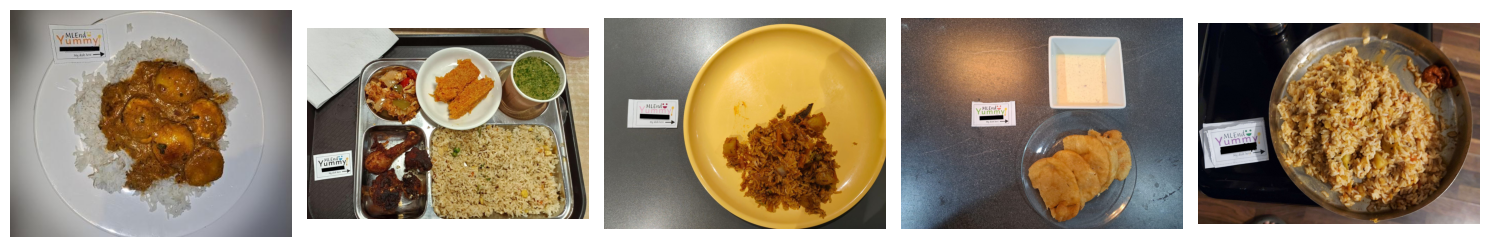

Chips


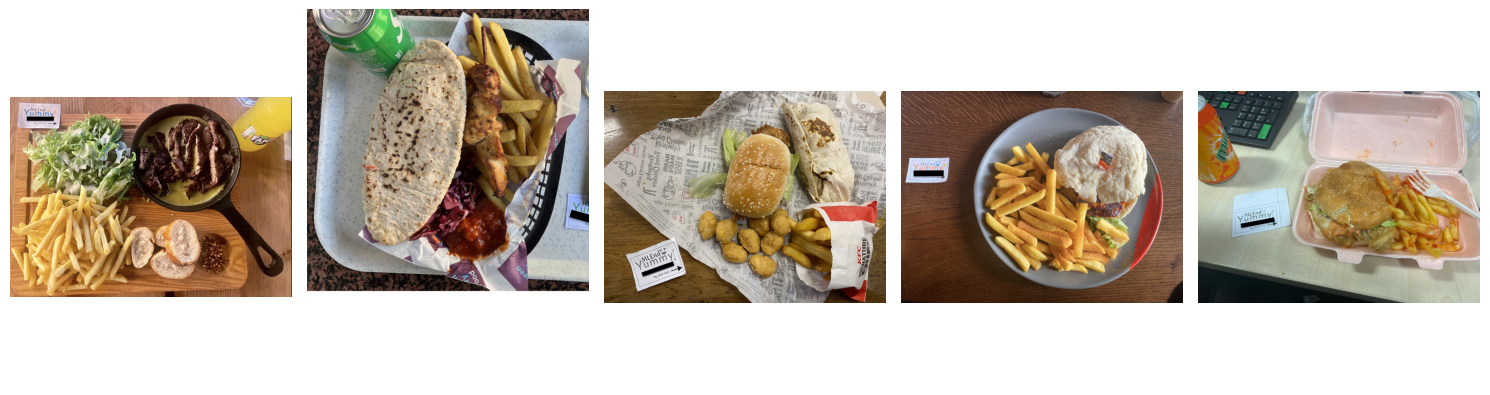

In [155]:
Chips_Img = np.array(X_train_paths)[Y_train==0]
Rice_Img = np.array(X_train_paths)[Y_train==1]

print('Rice')
plt.figure(figsize=(15,5))
for k,file in enumerate(Rice_Img[:5]):
  I = plt.imread(file)
  plt.subplot(1,5,k+1)
  plt.imshow(I)
  plt.axis('off')

plt.tight_layout()
plt.show()

print('Chips')
plt.figure(figsize=(15,5))
for k,file in enumerate(Chips_Img[:5]):
  I = plt.imread(file)
  plt.subplot(1,5,k+1)
  plt.imshow(I)
  plt.axis('off')

plt.tight_layout()
plt.show()

In [156]:
def make_it_square(I, pad=0):
  N,M,C = I.shape
  if N>M:
    Is = [np.pad(I[:,:,i], [(0,0),(0, N-M)], 'constant', constant_values=pad) for i in range(C)]
  else:
    Is = [np.pad(I[:,:,i], [(0, M-N),(0,0)], 'constant', constant_values=pad) for i in range(C)]

  return np.array(Is).transpose([1,2,0])

def resize_img(I,size=[100,100]):
  N,M,C = I.shape
  Ir = [sp.core.processing.resize(I[:,:,i],size) for i in range(C)]
  return np.array(Ir).transpose([1,2,0])

In [157]:
X_train = []
for k,file in enumerate(X_train_paths):
  sp.utils.ProgBar_JL(k,len(X_train_paths),L=50,color='blue')
  I = plt.imread(file)
  I = make_it_square(I, pad=0)
  I = resize_img(I,size=[200,200])
  X_train.append(I)


X_test = []
for k,file in enumerate(X_test_paths):
  sp.utils.ProgBar_JL(k,len(X_test_paths),L=50,color='blue')
  I = plt.imread(file)
  I = make_it_square(I, pad=0)
  I = resize_img(I,size=[200,200])
  X_test.append(I)

X_train = np.array(X_train)
X_test = np.array(X_test)
X_train.shape, X_test.shape

100%|▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓|102\102|
Done!
100%|▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓|52\52|
Done!


((102, 200, 200, 3), (52, 200, 200, 3))

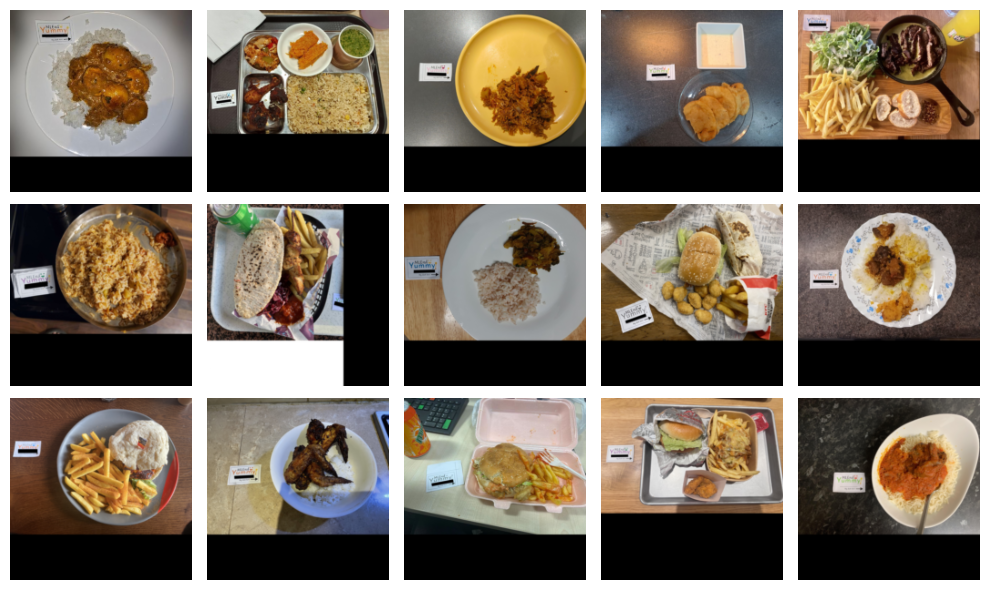

In [158]:
plt.figure(figsize=(10,6))
for k,I in enumerate(X_train):
  plt.subplot(3,5,k+1)
  plt.imshow(I)
  plt.axis('off')
  k+=1
  if k>=15:break
plt.tight_layout()
plt.show()

In [159]:
from skimage.feature import ORB
from skimage.feature import graycomatrix, graycoprops


def get_yellow_component(I,t1=27, t2=33):
  Ihsv = (rgb2hsv(I)*255).astype('uint8')
  mask = (Ihsv[:,:,0]<t2)*(Ihsv[:,:,0]>t1)
  Ypx = mask.sum()
  return Ypx

def GMLC_features(I):
  Ig = (rgb2gray(I)*255).astype('uint8')
  glcm = graycomatrix(Ig, distances=[5], angles=[0], levels=256,
                        symmetric=True, normed=True)
  f1 = graycoprops(glcm, 'dissimilarity')[0, 0]
  f2 = graycoprops(glcm, 'correlation')[0, 0]
  return f1,f2


def showConfMat(CM, labels = ['Chips','Rice']):
  plt.matshow(CM,cmap='Blues')
  for i in range(CM.shape[0]):
    for j in range(CM.shape[1]):
      plt.text(i,j,CM[i,j].round(2),ha='center',)
  plt.xticks([0,1],labels)
  plt.yticks([0,1],labels)
  plt.show()

In [160]:
X_train_f = []
for k, I in enumerate(X_train):
  f1 = get_yellow_component(I)
  f2,f3 = GMLC_features(I)
  X_train_f.append([f1,f2,f3])

X_test_f = []
for k, I in enumerate(X_test):
  f1 = get_yellow_component(I)
  f2,f3 = GMLC_features(I)
  X_test_f.append([f1,f2,f3])

In [161]:
X_train_f = np.array(X_train_f)
X_test_f = np.array(X_test_f)
X_train_f.shape, X_test_f.shape

((102, 3), (52, 3))

In [162]:
MEAN = X_train_f.mean(0)
SD = X_train_f.std(0)

X_train_fn = (X_train_f - MEAN)/SD
X_test_fn = (X_test_f - MEAN)/SD

In [163]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC

model = LinearSVC(C=1)
# model = RandomForestClassifier(n_estimators=5,max_depth=3)

model.fit(X_train_fn, Y_train)

LinearSVC(C=1)

In [164]:
ytp = model.predict(X_train_fn)
ysp = model.predict(X_test_fn)


train_accuracy = np.mean(ytp==Y_train)
test_accuracy  = np.mean(ysp==Y_test)

print('Training Accuracy:\t',train_accuracy)
print('Test  Accuracy:\t',test_accuracy)

Training Accuracy:	 0.6568627450980392
Test  Accuracy:	 0.6153846153846154


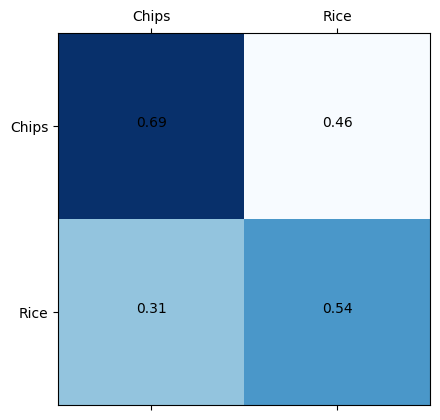

In [165]:
Ac = np.mean(ysp[Y_test.astype(int)==0]==0)
Ar = np.mean(ysp[Y_test.astype(int)==1]==1)

Mc = np.mean(ysp[Y_test.astype(int)==0]==1)
Mr = np.mean(ysp[Y_test.astype(int)==1]==0)

CM = np.array([[Ac, Mc],[Mr, Ar]])

showConfMat(CM)